# Esame del 21 Luglio 2025
### Francesco Cusenza - 0780292

Il rate di convergenza è: 0.8


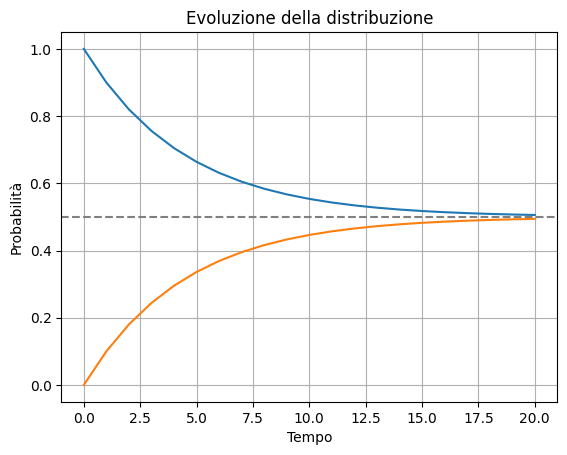

Distribuzione stazionaria: [[0.5]
 [0.5]]
Ordine catena di Markov: 0


In [ ]:
import numpy as np
from numpy.linalg import eig 

from scipy.linalg import eig
import matplotlib.pyplot as plt
# Data la catena di markov di ordine 1 determinare 
# la matrice stocastica associata, qual'è il rate di 
# convergenza verso la soluzione stazionaria e qual è 
# la matrice che descrive la distribuzione di probabilità

#ipotesi di matrice stocastica
P = np.array([[ 0.9, 0.1], #70% di 1 in 1, 30 di 1 in 2, stato di partenza riga, arrivo colonna
             [0.1, 0.9]]) #diag = prob di restare fermo. Sumrow = 1

eigvals = np.linalg.eigvals(P)
eigvals = np.sort(np.abs(eigvals))[::-1]
rate = eigvals[1]
print(f'Il rate di convergenza è: {rate:.2}')

# Evoluzione della distribuzione di probabilitò da pi(0) a pi(t)
# Nel tempo l'evoluzione è pi(t) = pi(0)*P^t

pi0 = ([1.0, 0.0]) #distr iniziale casuale
T = 20
pi_t = np.zeros((T+1, len(pi0))) #matrice con distribuzione a ogni passo t = 0..20
pi_t[0] = pi0

for t in range(1, T+1):
    pi_t[t] = pi_t[t-1] @ P # Moltiplicazione tra matrici
# la distribuzione evolve come π(t)=π(t−1)⋅P

#plot evoluzione distribuzione, come varia la prob di essere nei due stati
plt.plot(pi_t[:,0], label='Stato 0')
plt.plot(pi_t[:,1], label='Stato 1')
plt.axhline(np.linalg.matrix_power(P, 1000)[0,0], color='gray', linestyle='--', label='Stazionario')
plt.xlabel('Tempo')
plt.ylabel('Probabilità')
plt.title('Evoluzione della distribuzione')
plt.grid(True)
plt.show()
# La funzione stazionaria soddisfa anche P.T pi.T = pi.T dove con .T indico la trasposta, ovviamente soddisfa anche l'uguaglianza senza .T
w, v = eig(P.T)
stationary = v[:, np.isclose(w, 1)].real 
print("Distribuzione stazionaria:", stationary/stationary.sum())
n = 4
# Una catena di ordine k ha N^k stati composti => 
# k = logN(dim) con N = # di simboli e dim = ordine matrice di transizione (N^k x N^k)
k = int(round(np.log(P.shape[0])/np.log(n)))
print(f"Ordine catena di Markov: {k}")


In [ ]:
# Con file .fasta
from Bio.SeqIO import read
import numpy as np

record = read("Genome.fasta","fasta")
x_r = np.array(list(record.seq)) # Converti in array di lettere
x = np.zeros(len(x_r),dtype=int) # Codifica sequenza in numeri

for i in range(len(x)):
    if x_r[i] == 'A':
        x[i] = 0
    elif x_r[i] == 'C':
        x[i] = 1
    elif x_r[i] == 'G':
        x[i] = 2
    else:
        x[i] = 3

n = 4
M = np.zeros((n,n))

for k in range(len(x)-1):
    M[x[k],x[k+1]] += 1

M /= M.sum(axis=1,keepdims=True)
print(M)
# Una catena di ordine k ha N^k stati composti => 
# k = logN(dim) con N = # di simboli e dim = ordine matrice di transizione (N^k x N^k)
k = int(round(np.log(M.shape[0])/np.log(n)))
print(f"Ordine catena di Markov: {k}")
## continuiamo invece con .dat

[[2.78379214e-03 1.34395298e-01 8.59263842e-01 3.55706774e-03]
 [2.38272524e-03 1.48920328e-04 2.70588235e-01 7.26880119e-01]
 [6.34517766e-04 7.03680203e-01 5.55837563e-02 2.40101523e-01]
 [9.44869156e-01 4.41046751e-02 1.01440753e-02 8.82093502e-04]]
Ordine catena di Markov: 1


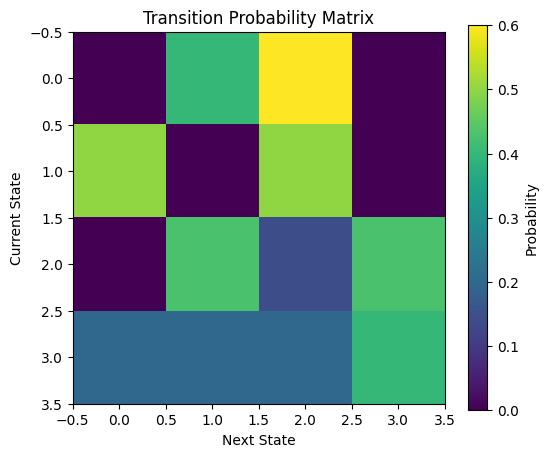

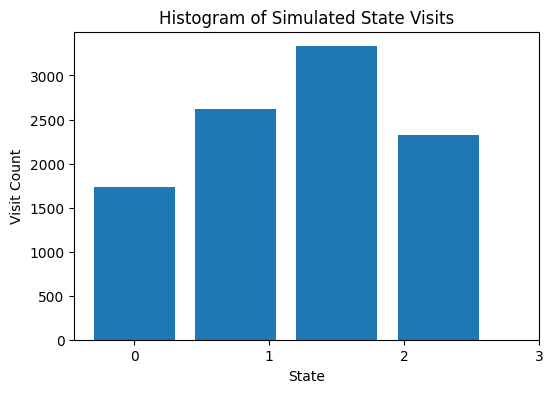

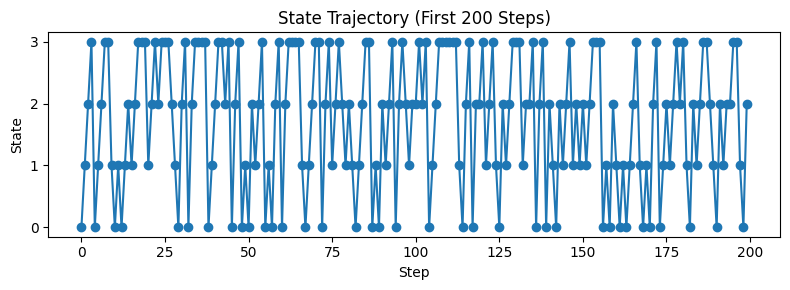

In [ ]:
# metodo più generale 
import matplotlib.pyplot as plt

sequence = [0, 1, 2, 1, 0, 2, 2,1, 2, 3, 2, 1, 0, 2, 3, 3, 3, 0, 2, 3, 1, 0, 1, 2]
num_states = 4

def transition_matrix(seq, num_states):
    matrix = np.zeros((num_states,num_states),dtype=float)
    for i in range(len(seq)-1):
        current = seq[i]
        next = seq[i+1]
        matrix[current,next]+=1
    row_sums = matrix.sum(axis=1,keepdims=True)
    row_sums[row_sums == 0] = 1.0
    transition = matrix/row_sums
    return transition

prob_matrix = transition_matrix(sequence, num_states)
plt.figure(figsize=(6, 5))
plt.imshow(prob_matrix, interpolation='nearest')
plt.title('Transition Probability Matrix')
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.colorbar(label='Probability')
plt.show()

initial_state = sequence[0]
num_steps = 10000 

def simulate_markov(transition_matrix, initial_state, num_steps):
    states = [initial_state]
    for _ in range(num_steps - 1):
        current = states[-1]
        next_state = np.random.choice(len(transition_matrix), p=transition_matrix[current])
        states.append(next_state)
    return states

simulated_states = simulate_markov(prob_matrix, initial_state, num_steps)
plt.figure(figsize=(6, 4))
plt.hist(simulated_states, bins=num_states, align='left', rwidth=0.8)
plt.title('Histogram of Simulated State Visits')
plt.xlabel('State')
plt.ylabel('Visit Count')
plt.xticks(range(num_states))
plt.show()

plt.figure(figsize=(8, 3))
plt.plot(simulated_states[:200], marker='o', linestyle='-')
plt.title('State Trajectory (First 200 Steps)')
plt.xlabel('Step')
plt.ylabel('State')
plt.yticks(range(num_states))
plt.tight_layout()
plt.show()
## riprende cusenza 

In [3]:
x = np.loadtxt("markov_chain.dat")
print(f'CATENA DI MARKOV:\n{x}')

states = np.array(x[:,1], dtype=int)
states = states - 1 # Cosi' partono da 0
N = 3 # Numero stati

CATENA DI MARKOV:
[[   0.    1.]
 [   1.    2.]
 [   2.    1.]
 ...
 [ 998.    1.]
 [ 999.    1.]
 [1000.    2.]]


In [ ]:
trans = np.zeros((N, N), dtype=int)

for t in range(len(states)-1):
    i = states[t]
    j = states[t+1]
    trans[i,j] += 1

P = trans / trans.sum(axis=1, keepdims=True) # Normalizzazione di ogni riga
# np.sum con axis=1 somma ogni riga, senza somma tutti gli el
print(f'MATRICE DI TRANSIZIONE:\n{P}')

MATRICE DI TRANSIZIONE:
[[0.506      0.242      0.252     ]
 [0.53846154 0.10121457 0.36032389]
 [0.44664032 0.40316206 0.15019763]]


In [ ]:
eigvals, eigvec = np.linalg.eig(P)
print(f'AUTOVALORI:\n{eigvals}\nAUTOVETTORI (colonne):\n{eigvec}')

AUTOVALORI:
[ 1.          0.01226365 -0.25485145]
AUTOVETTORI (colonne):
[[ 0.57735027  0.558766   -0.01282106]
 [ 0.57735027 -0.3640941  -0.70159328]
 [ 0.57735027 -0.74512821  0.71246228]]


In [ ]:
sort_eigvals = np.sort(np.abs(eigvals))[::-1] # ordine decrescente autovalori
print(f'AUTOVALORI ORDINATI:\n{sort_eigvals}') # rate = sort_eigvals[1]
print(f'Il secondo autovalore più grande determina la convergenza alla stazionarietà') #il primo è sempre circa 1

AUTOVALORI ORDINATI:
[1.         0.25485145 0.01226365]
Il secondo autovalore più grande determina la convergenza alla stazionarietà


In [8]:
# Determinazione stato stazionario
eigvalsT, eigvecT = np.linalg.eig(P.T) # Autovalori e autovettori della matrice trasposta, poichè pi_staz.T = P.T x pi_staz.T
stationarity = eigvecT[:, np.isclose(eigvalsT, 1)].real # Prendo la parte reale dell'autovettore associato ad 1
stationarity /= np.sum(stationarity) # Normalizzo l'autovettore associato ad 1
print(f'STAZIONARIETA\':\n{stationarity}') #a passi inf gli stati sarenno suddivisi nell'autovettore associato ad autovalore 1, le cui entries sommano a 1. se la mattrans è simmetrica, le entries sono equiprobabili
print(f'L \'autovettore associato al primo autovalore (1) corrisponde alla distribuzione di probabilità in cui convergerà il processo stocastico\nSi nota che al passo t->inf gli stati non sono equiprobabili, poichè in la matrice di transizione è asimetrica, in particolare favorisce lo stato 1')

STAZIONARIETA':
[[0.49902367]
 [0.24788894]
 [0.2530874 ]]
L 'autovettore associato al primo autovalore (1) corrisponde alla distribuzione di probabilità in cui convergerà il processo stocastico
Si nota che al passo t->inf gli stati non sono equiprobabili, poichè in la matrice di transizione è asimetrica, in particolare favorisce lo stato 1


In [7]:
# Controllo sul vettore stazionarietà, deve valere anche pi_staz = pi_staz x P
print("Check pi_staz = pi_staz x P:", np.allclose(stationarity.T @ P, stationarity.T))
print("Check pi_staz.T = P.T x pi_staz.T:", np.allclose(P.T @ stationarity, stationarity))

Check pi_staz = pi_staz x P: True
Check pi_staz.T = P.T x pi_staz.T: True
